# 機械学習入門
##  第5回の演習ノートブック [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/isshiki/machine-learning-with-python/blob/main/05-logistic-regression/05_logistic_regression.ipynb)

- ＠IT連載： [『Pythonで学ぶ「機械学習」入門【知識ゼロでも大丈夫】』](https://atmarkit.itmedia.co.jp/ait/subtop/features/di/machinelearning_index.html)
- 対応記事： [「「ロジスティック回帰」による分類をPythonで学ぼう」](https://atmarkit.itmedia.co.jp/ait/articles/xxx)

このノートブックは、[Apache License 2.0ライセンス](https://opensource.org/license/apache-2-0)で提供しています。商用でも使用・改変・複製・再配布が可能です。詳細については、LICENSEファイルをご覧ください。

In [1]:
#@title 実行環境のバージョンチェック

# Pythonや各ライブラリのバージョンによって、Pythonコードの挙動が異なる可能性があります。
# そのため、サンプルノートブック作成時の実行環境と一致させられるよう、本連載で提供する全てのサンプルノートブックではバージョン情報を出力しています。

from datetime import datetime
import platform
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import statsmodels

print(f'実行日: {datetime.now():%Y年%m月%d日}')
print(f'Python version: {platform.python_version()}')
print(f'NumPy version: {np.version.version}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'scikit-learn version: {sklearn.__version__}')

# 実行日: 2025年06月15日
# Python version: 3.11.13
# NumPy version: 2.0.2
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# scikit-learn version: 1.6.1

実行日: 2025年06月15日
Python version: 3.11.13
NumPy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
scikit-learn version: 1.6.1


通常はこのインストール作業は不要です。各ライブラリーのバージョンを、本ノートブック作成時と一致させたい場合は、次のコマンドをコードセルに入力して再インストールしてください。コマンド実行には管理者権限が必要です。

```bash
! pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 scikit-learn==1.6.1
```

### ■体験してみよう

scikit-learnには、分類タスクを解くためのロジスティック回帰モデルを構築できる`LogisticRegression`クラス（`sklearn.linear_model`モジュール）があります。

#### ●LogisticRegressionクラスの使い方

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(＜特徴量：X＞, ＜ターゲット：y＞)

model.predict_proba(＜新しいデータ＞)  # 予測値（＝確率値）を出力
model.predict(＜新しいデータ＞)  # 予測結果（＝0か1か）を出力
```

#### ●実際に使ってみよう： データセットの読み込み

今回は、scikit-learnから読み込める「Wine（ワイン）データセット」を使います。

- 参考：[Wine Dataset：ワイン（アルコール度数／色の濃さなどの13項目）の表形式データセット：AI・機械学習のデータセット辞典 - ＠IT](https://atmarkit.itmedia.co.jp/ait/articles/2208/25/news046.html)

入力データとなる特徴量には、下記の13項目があります。

1. **alcohol**： **アルコール度数**
2. **malic_acid**： **リンゴ酸**
3. **ash**： **灰分（かいぶん）**
4. **alcalinity_of_ash**： **灰分のアルカリ度**
5. **magnesium**： **マグネシウム**
6. **total_phenols**： **全フェノール含量**
7. **flavanoids**： **フラボノイド**
8. **nonflavanoid_phenols**： **非フラボノイドフェノール**
9. **proanthocyanins**： **プロアントシアニン**
10. **color_intensity**： **色の濃さ**
11. **hue**： **色相**
12. **od280/od315_of_diluted_wines**： **希釈ワイン溶液のOD280／OD315（280nmと315nmの吸光度の比）**
13. **proline**： **プロリン**


出力結果となるターゲットは以下の通りです。

- **クラス1：** ブドウ品種「1」のワインで、値は「**0**」（59件）
- **クラス2：** ブドウ品種「2」のワインで、値は「**1**」（71件）
- （※二値分類タスクにするため「クラス3」はカットしました）

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データセットの読み込み
wine = load_wine()

# 特徴量とターゲットの取得
X = wine.data
y = wine.target

# クラス1（0）とクラス2（1）のデータだけに絞り込む
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0)

print(f'訓練セットのサイズ: {X_train.shape}')  # 例: 訓練セットのサイズ: (117, 13)
print(f'テストセットのサイズ: {X_test.shape}')  # 例: テストセットのサイズ: (13, 13)

訓練セットのサイズ: (117, 13)
テストセットのサイズ: (13, 13)


#### ●実際に使ってみよう： 機械学習モデルの訓練

In [3]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルの訓練
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

print('係数：', model.coef_)
print('切片：', model.intercept_)
# 係数： [[-1.50497653 -0.53548103 -0.90018867  1.00264039 -0.31198706 -0.09362577
#   -0.28866105  0.2635515   0.25998733 -0.74083219 -0.00681288 -0.62169609
#   -1.85070478]]
# 切片： [0.2751988]

係数： [[-1.50497653 -0.53548103 -0.90018867  1.00264039 -0.31198706 -0.09362577
  -0.28866105  0.2635515   0.25998733 -0.74083219 -0.00681288 -0.62169609
  -1.85070478]]
切片： [0.2751988]


#### ●実際に使ってみよう： 訓練済みモデルによる予測

In [4]:
# テストセットを用いて分類予測（予測結果と確率値の取得）
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 先頭5件の予測結果と、その予測確率値を表示
print(f'実際のクラス（先頭5件）:{y_test[:5]}')
print(f'予測結果（先頭5件）:{y_pred[:5]}')
print('---')
print(f'予測確率値（先頭5件）:\n{y_proba[:5]}')
# 実際のクラス（先頭5件）:[0 1 1 1 1]
# 予測結果のクラス（先頭5件）:[0 1 1 1 1]
# ---
# 予測確率値（先頭5件）:
# [[0.99578134 0.00421866]
#  [0.00122679 0.99877321]
#  [0.0013692  0.9986308 ]
#  [0.02719697 0.97280303]
#  [0.00682272 0.99317728]]

実際のクラス（先頭5件）:[0 1 1 1 1]
予測結果（先頭5件）:[0 1 1 1 1]
---
予測確率値（先頭5件）:
[[0.99578134 0.00421866]
 [0.00122679 0.99877321]
 [0.0013692  0.9986308 ]
 [0.02719697 0.97280303]
 [0.00682272 0.99317728]]


#### ●モデルの評価と考察

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 予測結果（y_pred）と正解ラベル（y_test）を比較して、各評価指標を算出
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 結果を出力
print(f'正解率（Accuracy）: {acc:.2f}')
print(f'適合率（Precision）: {prec:.2f}')
print(f'再現率（Recall）: {rec:.2f}')
print(f'F1スコア（F1 Score）: {f1:.2f}')
# 正解率（Accuracy）: 1.00
# 適合率（Precision）: 1.00
# 再現率（Recall）: 1.00
# F1スコア（F1 Score）: 1.00

正解率（Accuracy）: 1.00
適合率（Precision）: 1.00
再現率（Recall）: 1.00
F1スコア（F1 Score）: 1.00


<a name="multinomial"></a>

### ■【発展】ソフトマックス回帰による多クラス分類

#### ●（1）3つ以上のクラスへの変更

In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データセットの読み込み
wine = load_wine()

# 特徴量とターゲットの取得
X = wine.data
y = wine.target

# 絞り込むを解除して全てのクラスを使用
# mask = (y == 0) | (y == 1)
# X = X[mask]
# y = y[mask]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0)

print(f'訓練セットのサイズ: {X_train.shape}')  # 例: 訓練セットのサイズ: (117, 13)
print(f'テストセットのサイズ: {X_test.shape}')  # 例: テストセットのサイズ: (13, 13)

訓練セットのサイズ: (160, 13)
テストセットのサイズ: (18, 13)


#### ●全く同じコード

In [7]:
from sklearn.linear_model import LogisticRegression

# ソフトマックス回帰モデルの訓練
model = LogisticRegression(solver='lbfgs', random_state=0)
model.fit(X_train, y_train)

# 各クラス（「クラス1」「クラス2」「クラス3」の3クラス）に対する係数と切片を表示
print('係数（クラスごとに13個ずつ）:\n',model.coef_)  # shape = (3, 13)
print('切片（クラスごとに1個）:\n',model.intercept_)  # shape = (3,)
# 係数（クラスごとに13個ずつ）:
# [[ 0.76123666  0.23147114  0.45417683 -0.79986366  0.02944999  0.22813803
#    0.76726979 -0.17465399  0.10120917  0.19011274  0.08581124  0.71224617
#    1.03028239]
#  [-0.96349503 -0.46615999 -0.82732004  0.55142334 -0.10573584 -0.00209638
#    0.23698459  0.18759155  0.27574822 -1.0456697   0.71497939  0.0787872
#   -1.09523377]
#  [ 0.20225838  0.23468886  0.37314321  0.24844032  0.07628585 -0.22604165
#   -1.00425438 -0.01293756 -0.37695738  0.85555695 -0.80079062 -0.79103337
#    0.06495138]]
# 切片（クラスごとに1個）:
# [ 0.4607247   0.66263181 -1.1233565 ]

係数（クラスごとに13個ずつ）:
 [[ 0.76123666  0.23147114  0.45417683 -0.79986366  0.02944999  0.22813803
   0.76726979 -0.17465399  0.10120917  0.19011274  0.08581124  0.71224617
   1.03028239]
 [-0.96349503 -0.46615999 -0.82732004  0.55142334 -0.10573584 -0.00209638
   0.23698459  0.18759155  0.27574822 -1.0456697   0.71497939  0.0787872
  -1.09523377]
 [ 0.20225838  0.23468886  0.37314321  0.24844032  0.07628585 -0.22604165
  -1.00425438 -0.01293756 -0.37695738  0.85555695 -0.80079062 -0.79103337
   0.06495138]]
切片（クラスごとに1個）:
 [ 0.4607247   0.66263181 -1.1233565 ]


In [8]:
# テストセットを用いて分類予測（予測結果と確率値の取得）
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 先頭5件の予測結果と、その予測確率値を表示
print(f'実際のクラス（先頭5件）: {y_test[:5]}')
print(f'予測結果（先頭5件）: {y_pred[:5]}')
print('---')
print(f'予測確率値（先頭5件）:\n{y_proba[:5]}')
# 実際のクラス（先頭5件）: [0 2 1 0 1]
# 予測結果（先頭5件）: [0 2 1 0 1]
# ---
# 予測確率値（先頭5件）:
# [[9.96482153e-01 2.41581891e-03 1.10202803e-03]
#  [3.30580572e-04 1.90924468e-04 9.99478495e-01]
#  [8.25258690e-03 9.91704860e-01 4.25531906e-05]
#  [9.91998062e-01 5.90543646e-03 2.09650193e-03]
#  [9.80682709e-02 8.93520440e-01 8.41128936e-03]]

実際のクラス（先頭5件）: [0 2 1 0 1]
予測結果（先頭5件）: [0 2 1 0 1]
---
予測確率値（先頭5件）:
[[9.96482153e-01 2.41581891e-03 1.10202803e-03]
 [3.30580572e-04 1.90924468e-04 9.99478495e-01]
 [8.25258690e-03 9.91704860e-01 4.25531906e-05]
 [9.91998062e-01 5.90543646e-03 2.09650193e-03]
 [9.80682709e-02 8.93520440e-01 8.41128936e-03]]


#### ●（2）複数クラスの評価スコアに対応

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 予測結果（y_pred）と正解ラベル（y_test）を比較して、各評価指標を算出
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 結果を出力
print(f'正解率（Accuracy）: {acc:.2f}')
print(f'適合率（Precision）: {prec:.2f}')
print(f'再現率（Recall）: {rec:.2f}')
print(f'F1スコア（F1 Score）: {f1:.2f}')
# 正解率（Accuracy）: 1.00
# 適合率（Precision）: 1.00
# 再現率（Recall）: 1.00
# F1スコア（F1 Score）: 1.00

正解率（Accuracy）: 1.00
適合率（Precision）: 1.00
再現率（Recall）: 1.00
F1スコア（F1 Score）: 1.00


### 今回は、これで終わりです。お疲れさまでした。

---

### ■【参考】本稿に掲載した図版のコード

以下に、本稿で使用した図版を作成するためのコードを参考として掲載しています。記事の理解には必要ありませんが、興味がある方は参考にしてください。

図版で日本語を使用しているため、以下のインストールとインポートが必要です。

In [10]:
! pip install japanize-matplotlib

In [11]:
import japanize_matplotlib

#### ●ロジスティック回帰による二値分類

#### 図3　ロジスティック回帰モデルの予測曲線の例

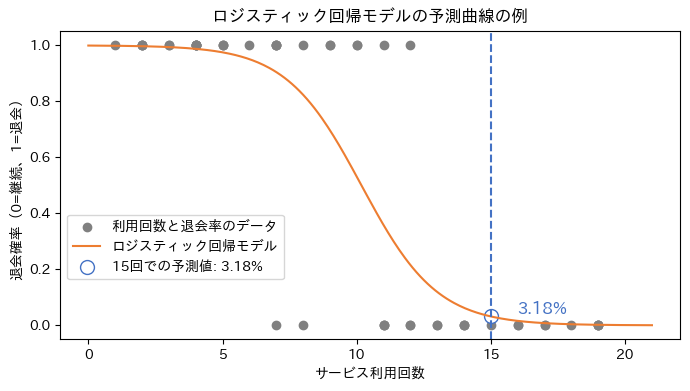

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# ロジスティック回帰モデルの曲線
model = LogisticRegression()
model.fit(x, y)

# 15回での退会予測
target_x = 15
target_prob = model.predict_proba([[target_x]])[0][1]

# 散布図のプロット
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='利用回数と退会率のデータ', color='gray')

# 予測曲線のプロット
x_test = np.linspace(0, 21, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]
plt.plot(x_test, y_prob, color='#ED7D31', label='ロジスティック回帰モデル')

# 15回での予測点とライン
plt.axvline(x=target_x, color='#4472C4', linestyle='--')
plt.scatter([target_x], [target_prob], color='white', edgecolor='#4472C4', s=100, label=f'{target_x}回での予測値: {target_prob:.2%}')
plt.text(target_x + 1.0, target_prob, f'{target_prob:.2%}', color='#4472C4', fontsize=12, verticalalignment='bottom')

plt.xlabel('サービス利用回数')
plt.ylabel('退会確率（0=継続、1=退会）')
plt.title('ロジスティック回帰モデルの予測曲線の例')
plt.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))

plt.show()

#### 図4　ロジスティック回帰モデルの決定境界の例

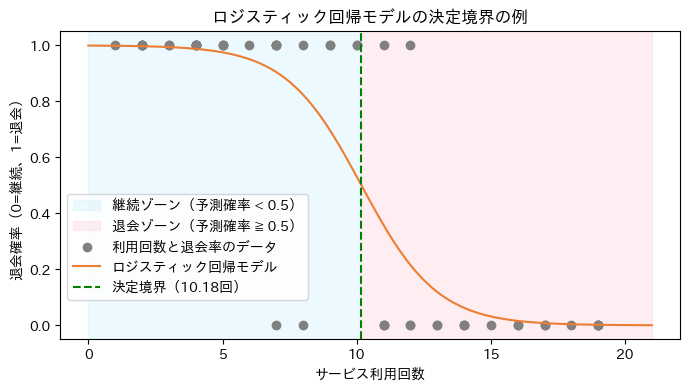

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# ロジスティック回帰モデルの曲線
model = LogisticRegression()
model.fit(x, y)

# 決定境界（確率0.5の点）を計算
intercept = model.intercept_[0]
coef = model.coef_[0][0]
decision_boundary = -intercept / coef  # coef * x + intercept = 0 の形で境界を作る

# 予測曲線のプロット用データ
x_test = np.linspace(0, 21, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]

# プロット
plt.figure(figsize=(8, 4))

# 背景色（継続：水色、退会：ピンク）
plt.axvspan(0, decision_boundary, color='#D0F0FD', alpha=0.4, label='継続ゾーン（予測確率 < 0.5）')
plt.axvspan(decision_boundary, 21, color='#FFD6DC', alpha=0.4, label='退会ゾーン（予測確率 ≧ 0.5）')

# データ点とモデル曲線
plt.scatter(x, y, label='利用回数と退会率のデータ', color='gray')
plt.plot(x_test, y_prob, color='#ED7D31', label='ロジスティック回帰モデル')

# 決定境界ライン（緑）
plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'決定境界（{decision_boundary:.2f}回）')

plt.xlabel('サービス利用回数')
plt.ylabel('退会確率（0=継続、1=退会）')
plt.title('ロジスティック回帰モデルの決定境界の例')
plt.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))

plt.show()

#### 図5　特徴量が1つのロジスティック回帰モデルでの予測曲線の数式

<font color="#ED7D31">$$y = 7.20915 - 0.70838 x$$</font>

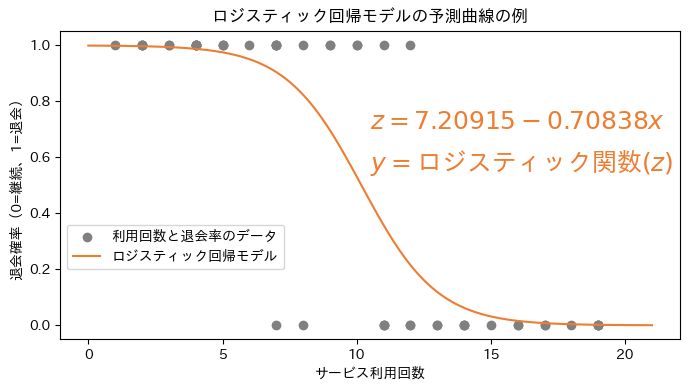

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# ロジスティック回帰モデルの曲線
model = LogisticRegression()
model.fit(x, y)

# 散布図のプロット
plt.figure(figsize=(8, 4))
plt.scatter(x, y, label='利用回数と退会率のデータ', color='gray')

# 予測曲線のプロット
x_test = np.linspace(0, 21, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]
plt.plot(x_test, y_prob, color='#ED7D31', label='ロジスティック回帰モデル')

# 線形結合と曲線への変換の数式
coef = model.coef_[0][0]
intercept = model.intercept_[0]
plt.text(10.5, 0.7, f'$z = {intercept:.5f} - {-coef:.5f}x$', fontsize=18, fontweight='bold', color='#ED7D31')
plt.text(10.5, 0.55, r'$y = $ロジスティック関数$ (z)$', fontsize=18, fontweight='bold', color='#ED7D31')

plt.xlabel('サービス利用回数')
plt.ylabel('退会確率（0=継続、1=退会）')
plt.title('ロジスティック回帰モデルの予測曲線の例')
plt.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))

plt.show()

#### 図6　仕組みの理解： 訓練セットをプロットした散布図

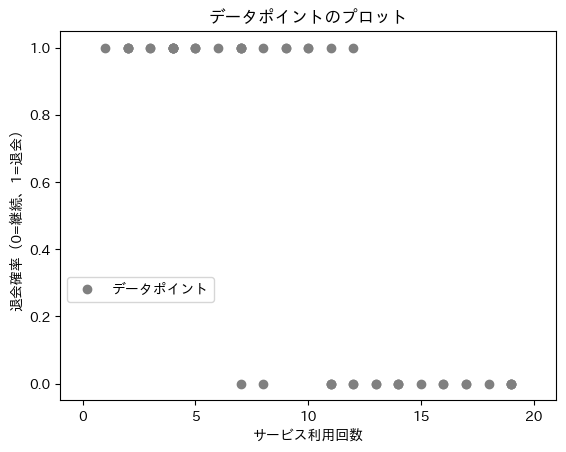

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# プロット
# plt.figure(figsize=(8, 4))
plt.xlim(-1, 21)  # 1つ外側に余白を持たせる
plt.xticks(np.arange(0, 21, 5))  # 0〜20まで1刻みの整数目盛り
plt.scatter(x, y, label='データポイント', color='gray')
plt.xlabel('サービス利用回数')
plt.ylabel('退会確率（0=継続、1=退会）')
plt.title('データポイントのプロット')
plt.legend(loc='center left', bbox_to_anchor=(0.0, 0.3))
plt.show()

#### 図7　「直線」を「S字型の曲線」に変換するためのロジスティック関数

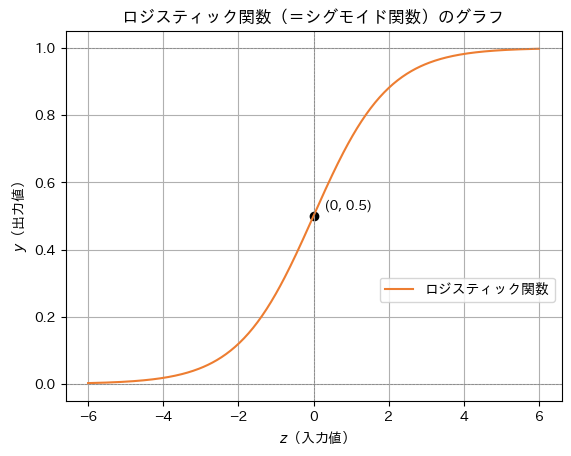

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数の定義
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# x軸の値を設定
x = np.linspace(-6, 6, 400)
y = sigmoid(x)

# プロット
plt.plot(x, y, color='#ED7D31', label='ロジスティック関数')

# 補助線と注釈
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.scatter([0], [0.5], color='black')
plt.text(0.3, 0.52, '(0, 0.5)', fontsize=10)

# 軸ラベルとタイトル
plt.xlabel('$z$（入力値）')
plt.ylabel('$y$（出力値）')
plt.title('ロジスティック関数（＝シグモイド関数）のグラフ')
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.3))
plt.grid(True)

plt.show()

#### 図8　仕組みの理解： 散布図上に描画した仮定の予測曲線

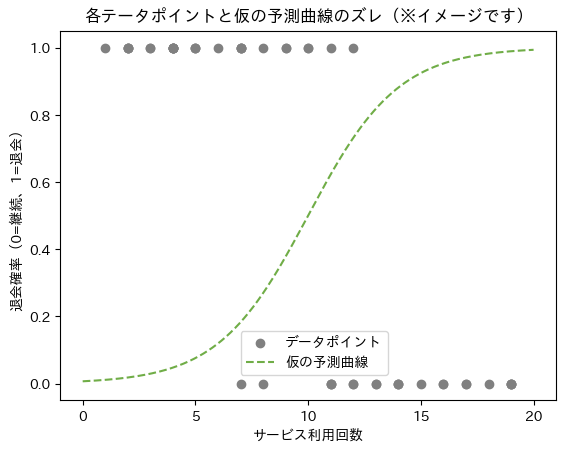

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# プロット
# plt.figure(figsize=(8, 4))
plt.xlim(-1, 21)  # 1つ外側に余白を持たせる
plt.xticks(np.arange(0, 21, 5))  # 0〜20まで5刻みの整数目盛り
plt.scatter(x, y, label='データポイント', color='gray')

# 仮のロジスティック関数パラメータ（ステップ3想定）
intercept = -5.0
coef = 0.5

# xの値（サービス利用回数）
x_vals = np.linspace(0, 20, 300)
z_vals = intercept + coef * x_vals
y_vals = 1 / (1 + np.exp(-z_vals))

# 曲線の描画
# plt.plot(x_vals, y_vals, color='#70AD47', linestyle='--', label=r'仮の予測曲線: $y = \frac{1}{1 + e^{-(-5.0 + 0.5x)}}$')
plt.plot(x_vals, y_vals, color='#70AD47', linestyle='--', label=r'仮の予測曲線')

plt.xlabel('サービス利用回数')
plt.ylabel('退会確率（0=継続、1=退会）')
plt.title('各テータポイントと仮の予測曲線のズレ（※イメージです）')
plt.legend(loc='lower left', bbox_to_anchor=(0.35, 0.05))
plt.show()

#### 図9　仕組みの理解： 各テータにおける「正解ラベルの確率分布」と「モデル出力の確率分布」（2つのクラスの場合）

サービス利用回数 12回 のときの退会確率は 73.11% です


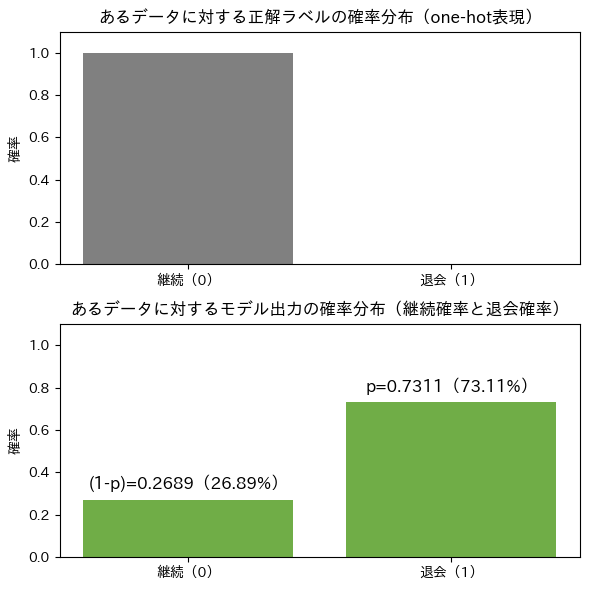

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# データとモデル
labels = ['継続（0）', '退会（1）']
true_label = [1.0, 0.0]
target_x = 12
target_prob = 1 / (1 + np.exp(- (intercept + coef * target_x)))
print(f'サービス利用回数 {target_x}回 のときの退会確率は {target_prob:.2%} です')
target_prob
model_output = [1-target_prob, target_prob]

# グラフ作成（縦に並べる：2行1列）
fig, axes = plt.subplots(2, 1, figsize=(6, 6))  # figsize 横幅x高さ

# 正解ラベル
axes[0].bar(labels, true_label, color='gray')
axes[0].set_ylim(0, 1.1)
axes[0].set_title('あるデータに対する正解ラベルの確率分布（one-hot表現）')
axes[0].set_ylabel('確率')
axes[0].tick_params(axis='x', labelrotation=0)

# モデル出力
axes[1].bar(labels, model_output, color='#70AD47')
axes[1].set_ylim(0, 1.1)
axes[1].set_title('あるデータに対するモデル出力の確率分布（継続確率と退会確率）')
axes[1].set_ylabel('確率')
axes[1].tick_params(axis='x', labelrotation=0)

# 棒の上に値を表示
axes[1].text(0, model_output[0] + 0.05, f'(1-p)={1-target_prob:.4f}（{1-target_prob:.2%}）', ha='center', fontsize=12)
axes[1].text(1, model_output[1] + 0.05, f'p={target_prob:.4f}（{target_prob:.2%}）', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#### 二値分類用の交差エントロピー

$$
\begin{align}
&\mathrm{Binary\ Cross\text{-}Entropy\ Loss} \\
&= -\frac{1}{n}\sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right] \\
&\color{gray}{= -\frac{1}{データ数} \sum_{i番目=1から}^{データ数まで} [ 正解値_{i番目　} \times 自然対数(予測値_{i番目　})} \\
&\color{gray}{　　　　　　　　　　　　 + (1 - 正解値_{i番目　}) \times 自然対数(1 - 予測値_{i番目　}) ]}
\end{align}
$$

$$
\hat{y}_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
$$

<a name="manualgd"></a>

#### 【フルスクラッチ実装】手動による勾配降下法

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# バッチ勾配降下法の実装
# 初期パラメータ
w = 0.0  # coef
b = 0.0  # intercept

# 学習率
lr = 0.1
# 繰り返し回数
num_iter = 10000

# 学習ループ
for i in range(num_iter):
    # 線形予測
    z = w * x.flatten() + b
    # シグモイド出力
    y_pred = 1 / (1 + np.exp(-z))
    
    # 損失（二値分類用の交差エントロピー）
    loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    
    # 勾配計算
    dw = np.mean((y_pred - y) * x.flatten())
    db = np.mean(y_pred - y)
    
    # パラメータ更新
    w -= lr * dw
    b -= lr * db
    
    # モニタリング（途中経過出力、オプション）
    if i % 1000 == 0:
        print(f"Iter {i}: loss={loss:.4f}, w={w:.4f}, b={b:.4f}")

# 学習済みパラメータ
print(f"\n最終結果: w={w:.4f}, b={b:.4f}")

# 決定境界（確率0.5の点）を計算
decision_boundary = -b / w

equation_text = fr'$y = \frac{{1}}{{1 + e^{{-({b:.2f} + {w:.2f} x)}}}}$'
print(equation_text)

Iter 0: loss=0.6931, w=-0.1580, b=0.0060
Iter 1000: loss=0.2540, w=-0.5016, b=4.9788
Iter 2000: loss=0.2409, w=-0.6050, b=6.0868
Iter 3000: loss=0.2377, w=-0.6564, b=6.6356
Iter 4000: loss=0.2367, w=-0.6862, b=6.9537
Iter 5000: loss=0.2363, w=-0.7047, b=7.1512
Iter 6000: loss=0.2361, w=-0.7166, b=7.2783
Iter 7000: loss=0.2361, w=-0.7244, b=7.3620
Iter 8000: loss=0.2360, w=-0.7297, b=7.4178
Iter 9000: loss=0.2360, w=-0.7332, b=7.4553

最終結果: w=-0.7355, b=7.4806
$y = \frac{1}{1 + e^{-(7.48 + -0.74 x)}}$


#### 図10　仕組みの理解： 交差エントロピーで描く曲線（切片）の谷底を見付ける

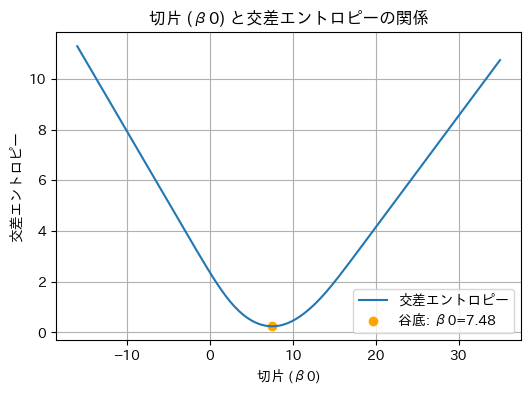

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# 仮のデータ
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# パラメーターβ0の範囲
beta0_values = np.linspace(-16, 35, 200)
beta0_fixed = 7.48
beta1_fixed = -0.74

# 損失計算
loss_values = []
epsilon = sys.float_info.epsilon

for beta0 in beta0_values:
    z = beta0 + beta1_fixed * x.flatten()
    pred_prob = 1 / (1 + np.exp(-z))
    loss = -np.mean(y * np.log(pred_prob + epsilon) + (1 - y) * np.log(1 - pred_prob + epsilon))
    loss_values.append(loss)

z = beta0_fixed + beta1_fixed * x.flatten()
pred_prob = 1 / (1 + np.exp(-z))
loss = -np.mean(y * np.log(pred_prob + epsilon) + (1 - y) * np.log(1 - pred_prob + epsilon))

# β0に対する交差エントロピーのプロット
plt.figure(figsize=(6, 4))
plt.plot(beta0_values, loss_values, label='交差エントロピー')
min_index = np.argmin(loss_values)
plt.scatter(beta0_fixed, loss, color='orange', label=f'谷底: β0={beta0_fixed:.2f}')
plt.xlabel('切片 (β0)')
plt.ylabel('交差エントロピー')
plt.title('切片 (β0) と交差エントロピーの関係')
plt.legend()
plt.grid(True)
plt.show()


#### 図11　仕組みの理解： 交差エントロピーで描く曲線（サービス利用回数に対する係数）の谷底を見付ける

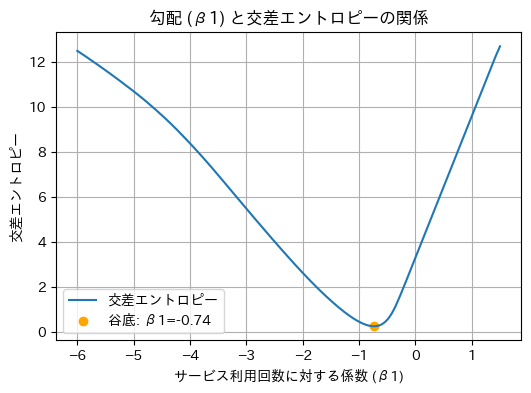

In [21]:
# パラメーターβ1の範囲
beta1_values = np.linspace(-6.0, 1.5, 200)
beta0_fixed = 7.48
beta1_fixed = -0.74

# 損失計算
loss_values_beta1 = []

for beta1 in beta1_values:
    z = beta0_fixed + beta1 * x.flatten()
    pred_prob = 1 / (1 + np.exp(-z))
    loss = -np.mean(y * np.log(pred_prob + epsilon) + (1 - y) * np.log(1 - pred_prob + epsilon))
    loss_values_beta1.append(loss)

z = beta0_fixed + beta1_fixed * x.flatten()
pred_prob = 1 / (1 + np.exp(-z))
loss = -np.mean(y * np.log(pred_prob + epsilon) + (1 - y) * np.log(1 - pred_prob + epsilon))

# β1に対する交差エントロピーのプロット
plt.figure(figsize=(6, 4))
plt.plot(beta1_values, loss_values_beta1, label='交差エントロピー')
min_index = np.argmin(loss_values_beta1)
plt.scatter(beta1_fixed, loss, color='orange', label=f'谷底: β1={beta1_fixed:.2f}')
plt.xlabel('サービス利用回数に対する係数 (β1)')
plt.ylabel('交差エントロピー')
plt.title('勾配 (β1) と交差エントロピーの関係')
plt.legend()
plt.grid(True)
plt.show()

#### 図12　仕組みの理解： 散布図上に描画した最適な予測曲線

<font color="#ED7D31">$$ z=7.48-0.74x $$</font>
<font color="#ED7D31">$$ y = \frac{1}{1 + e^{(7.48-0.74x)}} $$</font>

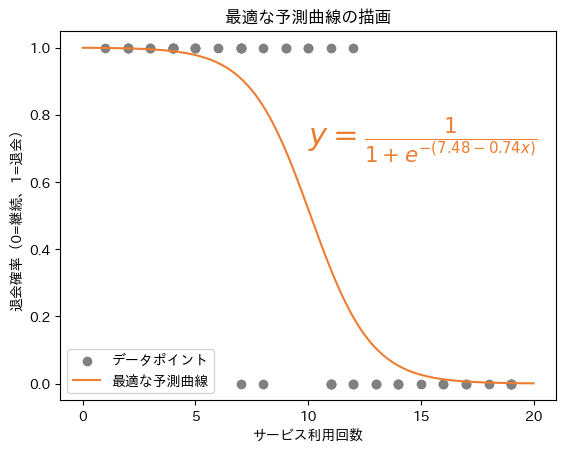

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# プロット
# plt.figure(figsize=(8, 4))
plt.xlim(-1, 21)  # 1つ外側に余白を持たせる
plt.xticks(np.arange(0, 21, 5))  # 0〜20まで5刻みの整数目盛り
plt.scatter(x, y, label='データポイント', color='gray')

# 最適なロジスティック回帰モデルの曲線
# model = LogisticRegression()
# model.fit(x, y)

# 決定境界（確率0.5の点）を計算
intercept = 7.48
coef = -0.74
decision_boundary = -intercept / coef

# xの値（サービス利用回数）
x_vals = np.linspace(0, 20, 300)
z_vals = intercept + coef * x_vals
y_vals = 1 / (1 + np.exp(-z_vals))

# 予測曲線の数式
# equation_text = r'$y = \frac{{1}}{{1 + e^{{-(7.20 -0.71 x)}}}}$'
equation_text = fr'$y = \frac{{1}}{{1 + e^{{-({intercept:.2f} {coef:.2f} x)}}}}$'
plt.text(10, 0.8, equation_text, color='#ED7D31', fontsize=22, fontweight='bold', verticalalignment='top')

# 予測曲線の描画
plt.plot(x_vals, y_vals, color='#ED7D31', label=r'最適な予測曲線')

plt.xlabel('サービス利用回数')
plt.ylabel('退会確率（0=継続、1=退会）')
plt.title('最適な予測曲線の描画')
plt.legend(loc='lower left')
plt.show()

#### 図13　仕組みの理解： 尤度を最大化するパラメーター$β_0$（切片）の例（イメージ図）

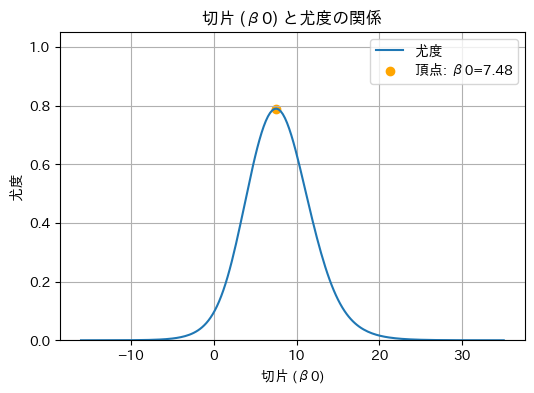

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# 仮のデータ
np.random.seed(42)
x = np.random.uniform(1, 20, 50).round().astype(int).reshape(-1, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-(10 - z)))
prob = sigmoid(x.flatten())
y = np.random.binomial(1, prob)

# パラメーターβ0の範囲
beta0_values = np.linspace(-16, 35, 200)
beta0_fixed = 7.48
beta1_fixed = -0.74

# 尤度（Likelihood）計算
likelihood_values = []
epsilon = sys.float_info.epsilon

for beta0 in beta0_values:
    z = beta0 + beta1_fixed * x.flatten()
    pred_prob = 1 / (1 + np.exp(-z))
    # 各データポイントの尤度の積 → 対数をとって安定化
    log_likelihood = np.sum(np.log(pred_prob + epsilon) * y + np.log(1 - pred_prob + epsilon) * (1 - y))
    likelihood_values.append(np.exp(log_likelihood / len(y)))  # 平均のexpをとって視覚化しやすくする

# β0_fixedに対する尤度
z = beta0_fixed + beta1_fixed * x.flatten()
pred_prob = 1 / (1 + np.exp(-z))
log_likelihood = np.sum(np.log(pred_prob + epsilon) * y + np.log(1 - pred_prob + epsilon) * (1 - y))
likelihood = np.exp(log_likelihood / len(y))

# プロット
plt.figure(figsize=(6, 4))
plt.plot(beta0_values, likelihood_values, label='尤度')
max_index = np.argmax(likelihood_values)
plt.scatter(beta0_fixed, likelihood, color='orange', label=f'頂点: β0={beta0_fixed:.2f}')
plt.ylim(0, 1.05)  # Y軸の目盛りを 0〜1.05 に固定
plt.xlabel('切片 (β0)')
plt.ylabel('尤度')
plt.title('切片 (β0) と尤度の関係')
plt.legend()
plt.grid(True)
plt.show()

#### ●ソフトマックス回帰による多クラス分類

ソフトマックス回帰（＝多項ロジスティック回帰）は、基本的に先ほどの二項ロジスティック回帰と同じ仕組みと考え方ですが、以下の2つの関数が置き換えられます。

- **確率分布を求める関数：** ロジスティック関数　→　ソフトマックス関数
- **隔離分布のズレを：** 二値分類用の交差エントロピー　→　多クラス分類用の交差エントロピー

#### ソフトマックス関数

$$
y_j = \frac {e^{x_j}}{\sum_{k=1}^me^{x_k}}~~~~~(j=1,2,\cdots,m)
$$

#### 図14　仕組みの理解： 各テータにおける「正解ラベルの確率分布」と「モデル出力の確率分布」（3つのクラスの場合）

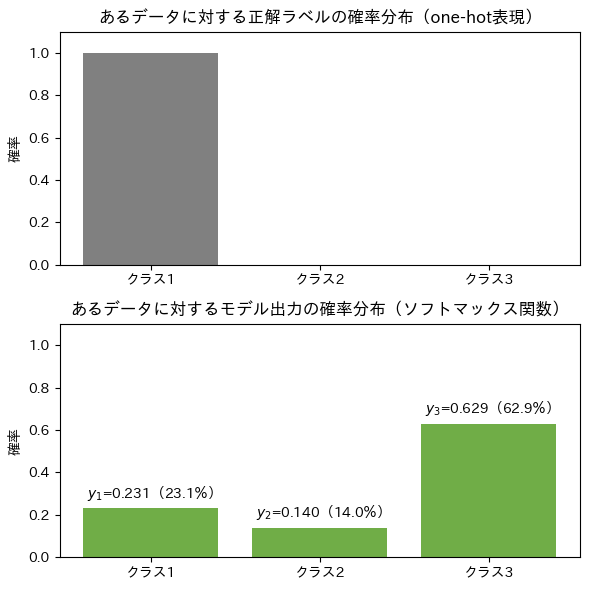

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# データとモデル
labels = ['クラス1', 'クラス2', 'クラス3']
true_label = [1.0, 0.0, 0.0]  # 正解はクラス1
model_output = [0.231, 0.140, 0.629]  # ソフトマックス出力

# グラフ作成（縦に並べる：2行1列）
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# 正解ラベル（one-hot）
axes[0].bar(labels, true_label, color='gray')
axes[0].set_ylim(0, 1.1)
axes[0].set_title('あるデータに対する正解ラベルの確率分布（one-hot表現）')
axes[0].set_ylabel('確率')
axes[0].tick_params(axis='x', labelrotation=0)

# モデル出力（ソフトマックス）
axes[1].bar(labels, model_output, color='#70AD47')
axes[1].set_ylim(0, 1.1)
axes[1].set_title('あるデータに対するモデル出力の確率分布（ソフトマックス関数）')
axes[1].set_ylabel('確率')
axes[1].tick_params(axis='x', labelrotation=0)

# 棒の上に数値を表示（小数3桁＋パーセント表記）
for i, prob in enumerate(model_output):
    axes[1].text(i, prob + 0.05, f'$y_{i+1}$={prob:.3f}（{prob*100:.1f}％）', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#### 多クラス分類用の交差エントロピー

$$
\begin{align}
&\mathrm{Multi\text{-}class\ Cross\text{-}Entropy\ Loss} \\
&= -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{m} y_{i,k} \log(\hat{y}_{i,k}) \\
&\color{gray}{= -\frac{1}{データ数} \sum_{i番目=1から  　　　}^{データ数まで}} \\
&\color{gray}{　　　　　　　　　\sum_{k番目=1から}^{クラス数まで} 正解値_{i番目,\ k番目　　} \times 自然対数(予測値_{i番目,\ k番目　　})}
\end{align}
$$

$$
\hat{y}_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
$$